### Chapter 4.1 - Titanic (2/2)

In [1]:
## cabin, name 변수를 가공&추가 하여 모형의 성능을 개선시켜보자 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('data/titanic_train.csv')
df_test = pd.read_csv('data/titanic_test.csv')

## 불필요한 컬럼 제거
df_train = df_train.drop(['ticket', 'body', 'home.dest'], axis = 1)
df_test = df_test.drop(['ticket', 'body', 'home.dest'], axis = 1)

## age의 결측값은 평균으로, embark의 결측값은 최빈값으로 대체 
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [4]:
## one-hot encoding 준비 
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

#### Step 1. cabin 활용하기 

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
C22 C26            4
                  ..
B26                1
C148               1
A21                1
C95                1
A14                1
Name: cabin, Length: 186, dtype: int64


<AxesSubplot:>

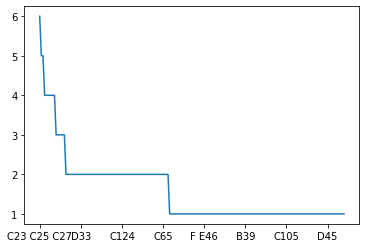

In [12]:
print(whole_df['cabin'].value_counts())
whole_df['cabin'].value_counts().plot()

X                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
F33                   4
                   ... 
A10                   1
F38                   1
C30                   1
C90                   1
A14                   1
Name: cabin, Length: 187, dtype: int64


<AxesSubplot:>

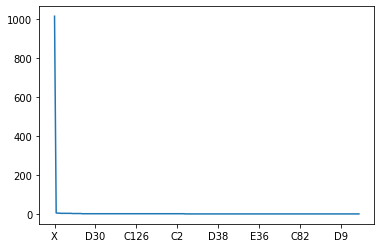

In [15]:
## 결측치 대체 
whole_df['cabin'] = whole_df['cabin'].fillna('X')

print(whole_df['cabin'].value_counts())
whole_df['cabin'].value_counts().plot()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64


<AxesSubplot:>

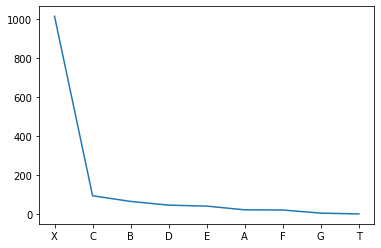

In [16]:
## 첫번째 알파벳 추출
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])

print(whole_df['cabin'].value_counts())
whole_df['cabin'].value_counts().plot()

X    1020
C      94
B      65
D      46
E      41
A      22
F      21
Name: cabin, dtype: int64


<AxesSubplot:>

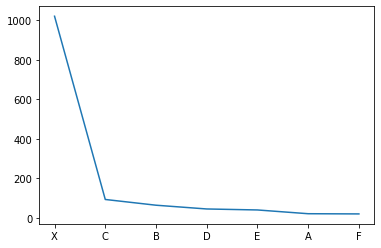

In [17]:
## G, T --> X (너무 수가 적음)
whole_df['cabin'] = whole_df['cabin'].replace({'G':'X', 'T':'X'})
print(whole_df['cabin'].value_counts())
whole_df['cabin'].value_counts().plot()

<AxesSubplot:xlabel='cabin', ylabel='count'>

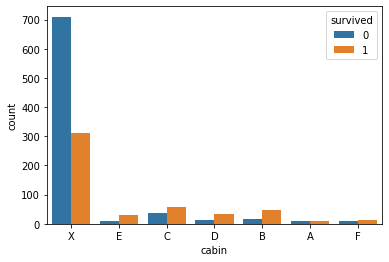

In [18]:
sns.countplot(data= whole_df, x = 'cabin', hue = 'survived')

#### Step 2. name 활용하기 

In [20]:
whole_df['name']

0                 Mellinger, Miss. Madeleine Violet
1                                 Wells, Miss. Joan
2                    Duran y More, Miss. Florentina
3                                Scanlan, Mr. James
4                      Bradley, Miss. Bridget Delia
                           ...                     
388               Karlsson, Mr. Julius Konrad Eugen
389    Ware, Mrs. John James (Florence Louise Long)
390                            O'Keefe, Mr. Patrick
391                                Tobin, Mr. Roger
392                            Daniels, Miss. Sarah
Name: name, Length: 1309, dtype: object

In [25]:
## title 추출 
name_grade = whole_df['name'].apply(lambda x: x.split(', ', 1)[1].split('.')[0])
name_grade = name_grade.unique().tolist()
name_grade

['Miss',
 'Mr',
 'Master',
 'Mrs',
 'Dr',
 'Mlle',
 'Col',
 'Rev',
 'Ms',
 'Mme',
 'Sir',
 'the Countess',
 'Dona',
 'Jonkheer',
 'Lady',
 'Major',
 'Don',
 'Capt']

In [26]:
# 호칭에 따라 사회적 지위(1910년대 기준)를 정의합니다.
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직을 나타냅니다.
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성을 나타냅니다.
              'C': ['Jonkheer', 'the Countess'], # 귀족이나 작위를 나타냅니다.
              'D': ['Mr', 'Don'], # 남성을 나타냅니다.
              'E': ['Master'], # 젊은남성을 나타냅니다.
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성을 나타냅니다.

# 정의한 호칭의 기준에 따라, A~F의 문자로 name 피처를 다시 정의하는 함수입니다.
def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'
    
# 위의 함수를 적용하여 name 피처를 새롭게 정의합니다.
whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))
whole_df['name'].value_counts()

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64

   pclass  survived name     sex        age  sibsp  parch     fare cabin  \
0       2         1    F  female  13.000000      0      1  19.5000     X   
1       2         1    F  female   4.000000      1      1  23.0000     X   
2       2         1    F  female  30.000000      1      0  13.8583     X   
3       3         0    D    male  30.231444      0      0   7.7250     X   
4       3         1    F  female  22.000000      0      0   7.7250     X   

  embarked  
0        S  
1        S  
2        C  
3        Q  
4        Q  


<AxesSubplot:xlabel='name', ylabel='count'>

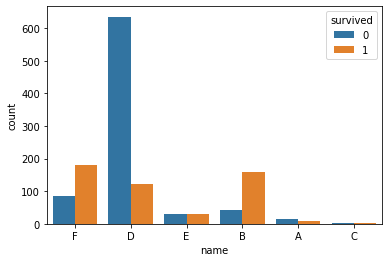

In [28]:
print(whole_df.head())
sns.countplot(data = whole_df, x = 'name', hue = 'survived' )

In [29]:
## one-hot coding 
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


#### Step 3. Model training

accuracy: 0.79
Precision : 0.736
Recall : 0.701
F1 : 0.718
AUC : 0.853


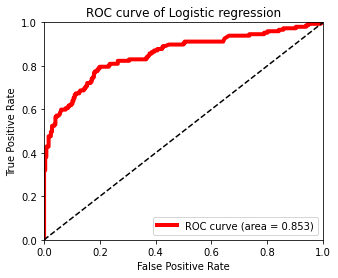

In [31]:
## logistic regression 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리합니다.
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

# 로지스틱 회귀 모델을 학습합니다.
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환합니다.
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred)) # AUC (Area Under the Curve) & ROC curve

# AUC (Area Under the Curve)를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

In [64]:
# 예측 대상인 survived 피처를 제외한 모든 피처를 리스트로 반환합니다. (그래프의 y축)
cols = df_train.columns.tolist()
cols.remove('survived')
print(cols)
print('------------------------------')
print(lr.coef_)

['pclass', 'age', 'sibsp', 'parch', 'fare', 'name_A', 'name_B', 'name_C', 'name_D', 'name_E', 'name_F', 'sex_female', 'sex_male', 'cabin_A', 'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_X', 'embarked_C', 'embarked_Q', 'embarked_S']
------------------------------
[[-0.53799903 -0.02037046 -0.48496682 -0.19401051  0.00331904 -0.06095274
   0.76659293 -0.05023261 -1.13741411  1.34544048  0.39604528  1.2339423
   0.02553694  0.03360303  0.49303327 -0.43708697  0.61707656  0.61680263
   0.52777899 -0.59172826  0.7249885   0.34786907  0.18662167]]


In [82]:
## 빈 데이터프레임 만들고 값들을 입력 
coef_table = pd.DataFrame(index=range(0,23), columns=['Features', 'coef'])
coef_table['Features'] = cols
coef_table['coef'] = lr.coef_[0]

coef_table.head()

,Features,coef
0,pclass,-0.537999
1,age,-0.020370
2,sibsp,-0.484967
3,parch,-0.194011
4,fare,0.003319


<AxesSubplot:xlabel='coef', ylabel='Features'>

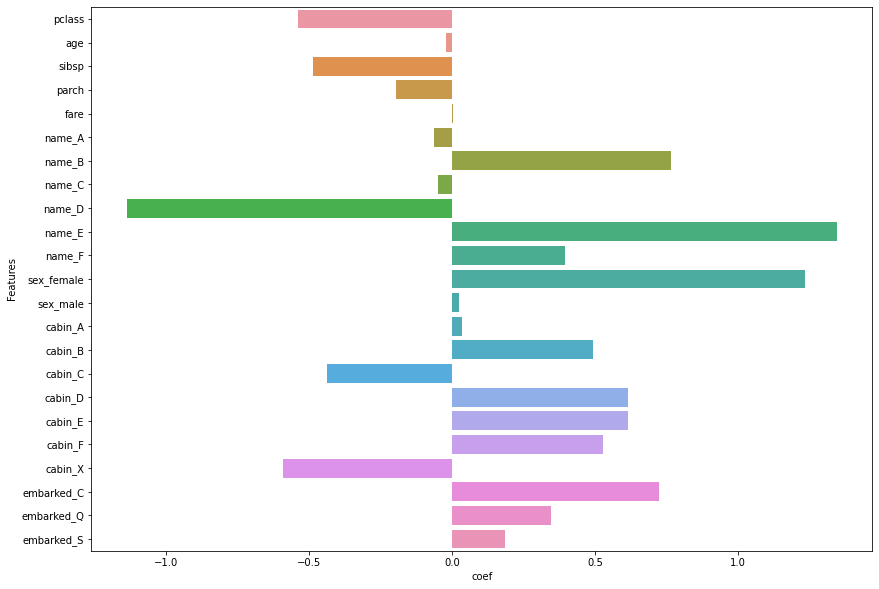

In [91]:
plt.figure(figsize = (14,10) )
#sns.barplot(data = coef_table, x = 'Features', y = 'coef')
sns.barplot(data = coef_table, y = 'Features', x = 'coef', orient = 'h')

#### Step 4. K-fold validation & Learning curve

In [92]:
from sklearn.model_selection import KFold

# K-fold 교차 검증의 k를 5로 설정
k = 5
cv = KFold(k, shuffle=True, random_state=0)
acc_history = []

# K-fold를 5번의 분할 학습으로 반복
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):

    # 5개로 분할된 fold 중 4개를 학습 데이터셋, 1개를 테스트 데이터셋으로 지정합니다. 매 반복시마다, 테스트 데이터셋은 변경됩니다.
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    # survived 피처를 y, 나머지 피처들을 x 데이터로 지정
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values
    
    # 주어진 데이터로 로지스틱 회귀 모델을 학습
    lr = LogisticRegression(random_state=0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    
    # 테스트 데이터셋의 Accuracy를 계산하여 acc_history에 저장
    splited_acc = accuracy_score(splited_y_test, y_pred)
    acc_history.append(splited_acc)

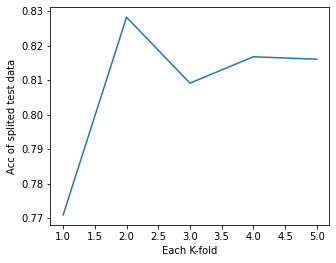

In [96]:
# acc_history에 저장된 5번의 학습 결과(Accuracy)를 그래프로 출력
plt.figure(figsize = (5,4))
plt.xlabel("Each K-fold")
plt.ylabel("Acc of splited test data")
plt.plot(range(1, k+1), acc_history)

##### <font color = 'yellow'> - cross validation 실행횟수에 따른 AUC 변화 : 샘플수가 적어 모형이 불안정함 </font>

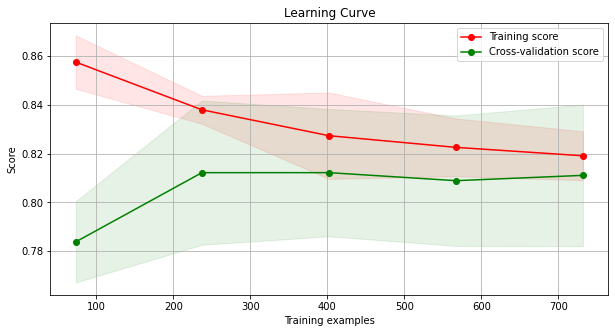

In [99]:
#! pip install scikit-plot
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()

##### <font color = 'yellow'> - sample수 증가에 따른 socre 변화 예측 : n > 400 이면 overfitting을 피할 수 있다 </font>